In [0]:
# WEEK 4: DELAY ANALYSIS (Airline & Weather)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data
df = pd.read_csv("/Volumes/workspace/default/airlines/Flight_delay.csv")

# Ensure datetime conversion
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Fill null delay values
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
df[delay_cols] = df[delay_cols].fillna(0)

# Derived total delay
df['TotalDelay'] = df[delay_cols].sum(axis=1)

# Extract hour from departure time (ensure valid)
df['DepHour'] = df['DepTime'].astype(str).str.zfill(4).str[:2].astype(int)

/home/spark-560cc7d2-538d-48ea-b463-a6/.ipykernel/2656/command-6921775423478380-945173139:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


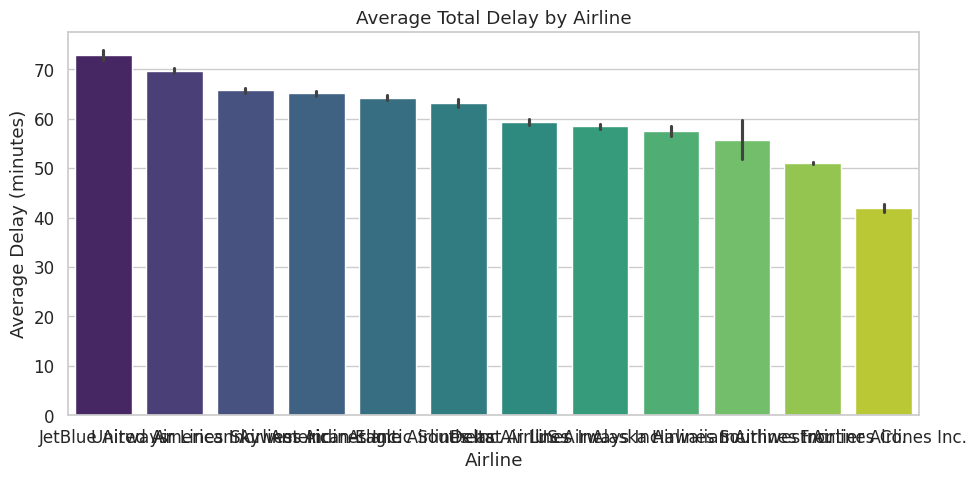

In [0]:
# Bar Chart — Average Total Delay by Airline
plt.figure(figsize=(10,5))
sns.barplot(
    x='Airline', 
    y='TotalDelay', 
    data=df,
    estimator='mean',
    order=df.groupby('Airline')['TotalDelay'].mean().sort_values(ascending=False).index,
    palette='viridis'
)
plt.title("Average Total Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay (minutes)")
plt.tight_layout()
display(plt.gcf()); plt.close()

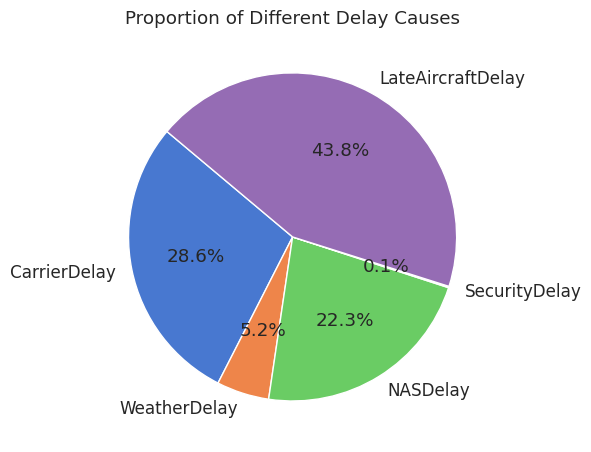

In [0]:
# Pie Chart — Distribution of Delay Types

delay_sums = df[delay_cols].sum()
plt.figure(figsize=(6,6))
plt.pie(delay_sums, labels=delay_sums.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Different Delay Causes")
plt.tight_layout()
display(plt.gcf()); plt.close()

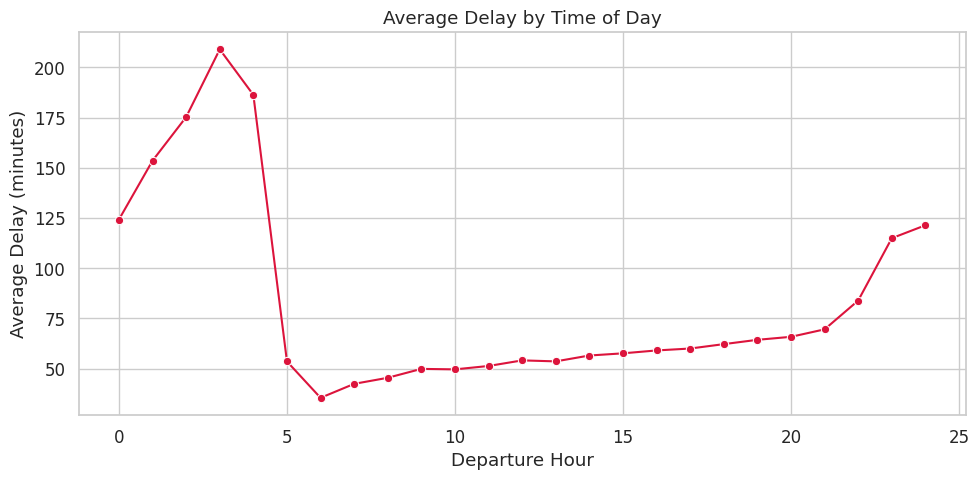

In [0]:
# Line Chart — Average Delay by Time of Day

hourly_delay = df.groupby('DepHour')['TotalDelay'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_delay.index, y=hourly_delay.values, marker='o', color='crimson')
plt.title("Average Delay by Time of Day")
plt.xlabel("Departure Hour")
plt.ylabel("Average Delay (minutes)")
plt.grid(True)
plt.tight_layout()
display(plt.gcf()); plt.close()

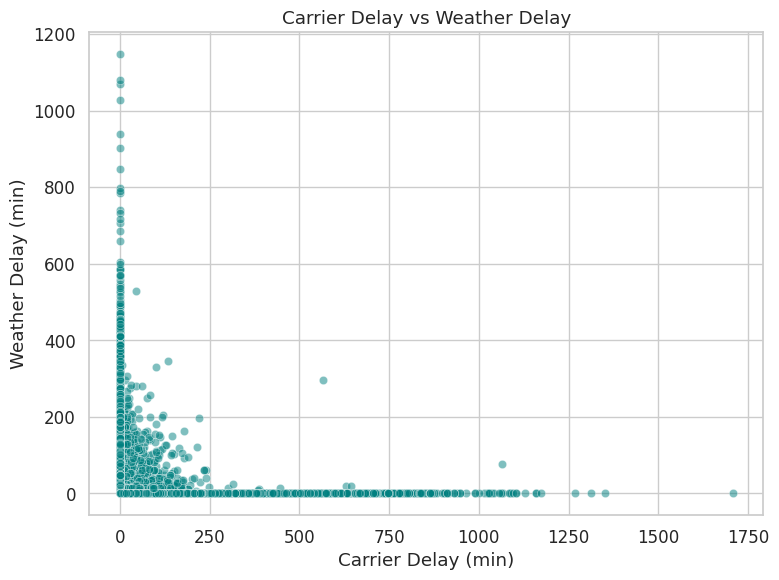

In [0]:
# 4️⃣ Scatter Plot — Weather Delay vs Carrier Delay

plt.figure(figsize=(8,6))
sns.scatterplot(x='CarrierDelay', y='WeatherDelay', data=df, alpha=0.5, color='teal')
plt.title("Carrier Delay vs Weather Delay")
plt.xlabel("Carrier Delay (min)")
plt.ylabel("Weather Delay (min)")
plt.tight_layout()
display(plt.gcf()); plt.close()

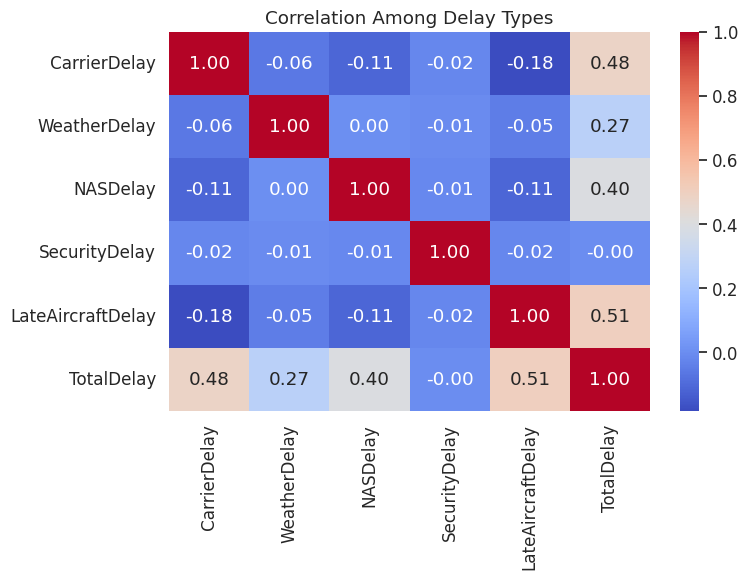

In [0]:
# Heatmap — Correlation Between Delay Types

plt.figure(figsize=(8,6))
corr = df[delay_cols + ['TotalDelay']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Among Delay Types")
plt.tight_layout()
display(plt.gcf()); plt.close()

/home/spark-560cc7d2-538d-48ea-b463-a6/.ipykernel/2656/command-6921775423478385-2937777815:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Airline', y='TotalDelay', data=df, palette='magma')


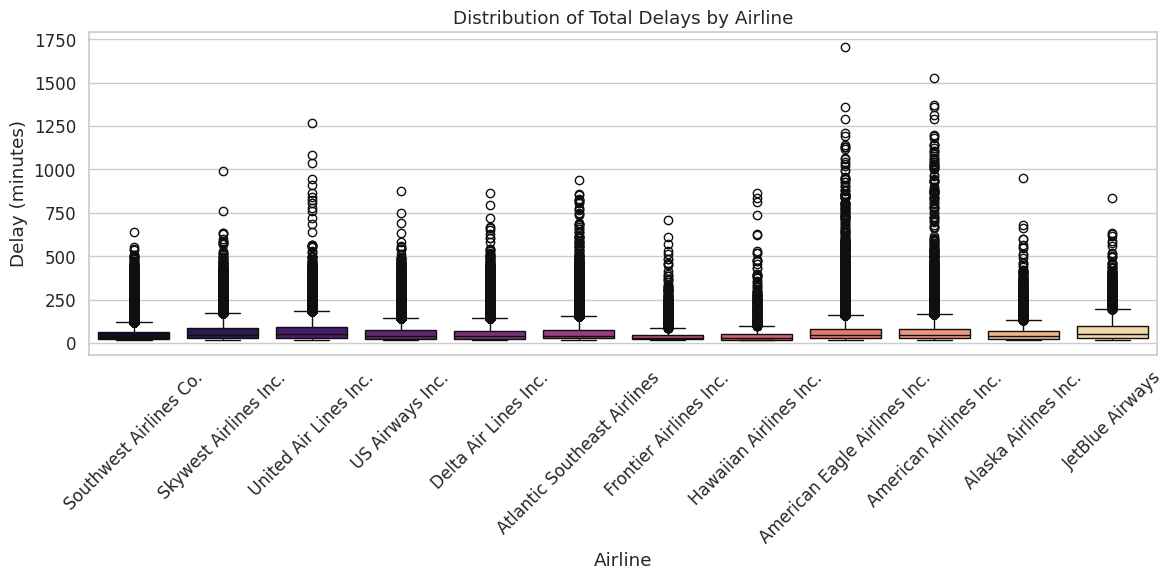

In [0]:
# Box Plot — Distribution of Total Delay by Airline

plt.figure(figsize=(12,6))
sns.boxplot(x='Airline', y='TotalDelay', data=df, palette='magma')
plt.title("Distribution of Total Delays by Airline")
plt.xlabel("Airline")
plt.ylabel("Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
display(plt.gcf()); plt.close()

/home/spark-560cc7d2-538d-48ea-b463-a6/.ipykernel/2656/command-6921775423478386-1315017116:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Airline', y='NASDelay', data=df, palette='cubehelix')


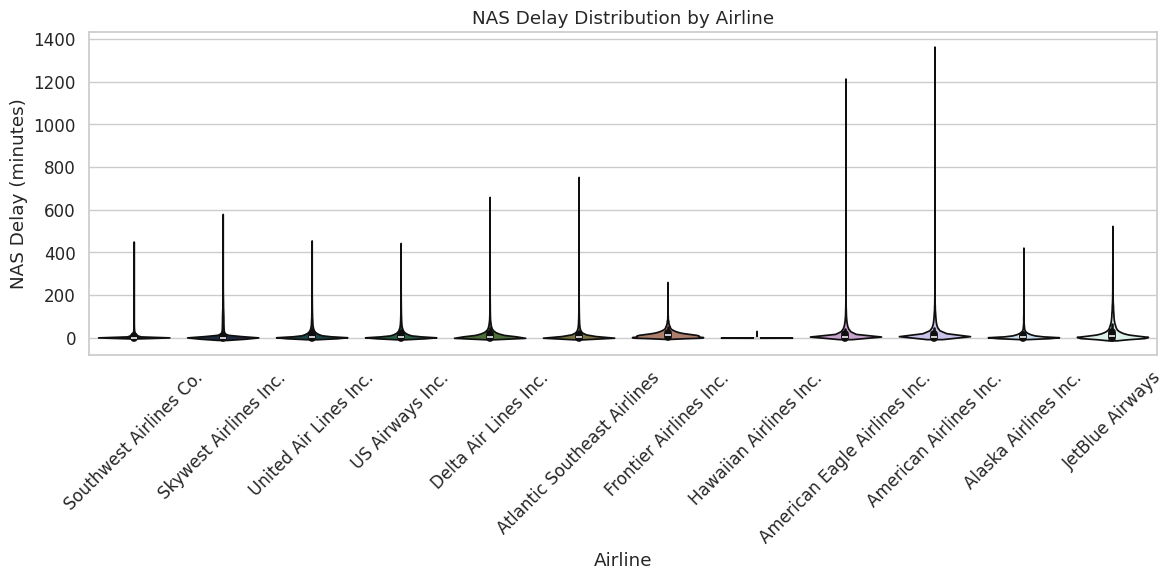

In [0]:
# Violin Plot — NAS Delay by Airline

plt.figure(figsize=(12,6))
sns.violinplot(x='Airline', y='NASDelay', data=df, palette='cubehelix')
plt.title("NAS Delay Distribution by Airline")
plt.xlabel("Airline")
plt.ylabel("NAS Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
display(plt.gcf()); plt.close()

/home/spark-560cc7d2-538d-48ea-b463-a6/.ipykernel/2656/command-6921775423478387-2542728267:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airport_delay.values, y=airport_delay.index, palette='crest')


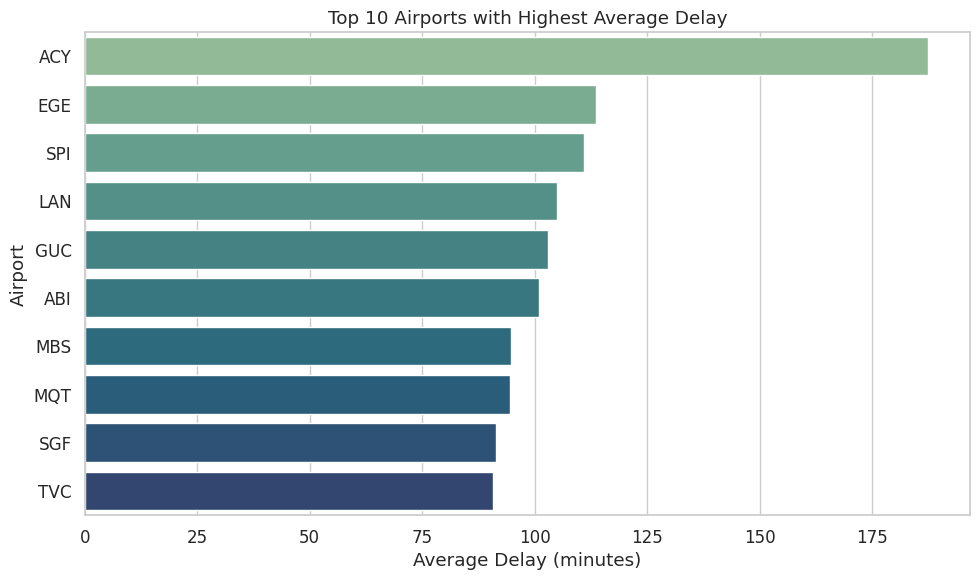

In [0]:
# Horizontal Bar Chart — Top 10 Delay-Prone Airports

airport_delay = df.groupby('Origin')['TotalDelay'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=airport_delay.values, y=airport_delay.index, palette='crest')
plt.title("Top 10 Airports with Highest Average Delay")
plt.xlabel("Average Delay (minutes)")
plt.ylabel("Airport")
plt.tight_layout()
display(plt.gcf()); plt.close()